#**THE SPARKS FOUNDATION**
### #GRIPAUG21
TASK 1: Prediction using supervised ML

AUTHOR: Shripad Pathre

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [ ]:
data = pd.read_csv('http://bit.ly/w-data')
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
# Check if there any null value in the Dataset
data.isnull == True

False

As there are no null values, lets visualize our data.

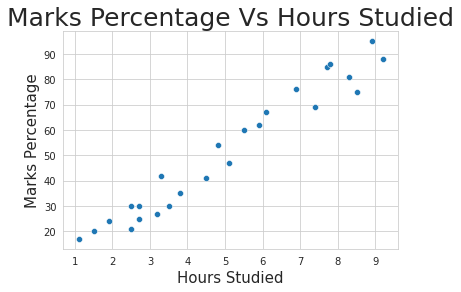

In [ ]:
sns.set_style('whitegrid')
sns.scatterplot(y= data['Scores'], x= data['Hours'])
plt.title('Marks Percentage Vs Hours Studied',size=25)
plt.ylabel('Marks Percentage', size=15)
plt.xlabel('Hours Studied', size=15)
plt.show()


The above plot is scatter plot. After observing it, there seems to be a correlation between 'Marks Percentage' and 'Hours Studied'. By plotting a regression line we can confirm this correlation. 

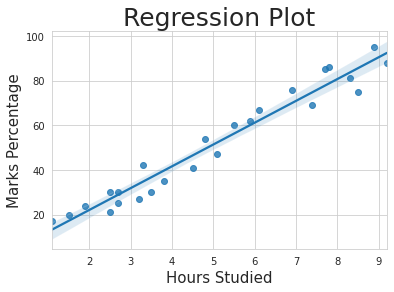

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [ ]:
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=25)
plt.ylabel('Marks Percentage', size=15)
plt.xlabel('Hours Studied', size=15)
plt.show()
print(data.corr())

From the regression plot it is confirmed that the variables are positively correleated.

#TRAINING MODEL

#1. Splitting the data

In [ ]:
# Defining X and y from the Data
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

# Spliting the Data in two
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

#2. Fitting the data in the model

In [ ]:
regression = LinearRegression()
regression.fit(train_X, train_y)
print("Model is trained successfully")

Model is trained successfully


#3. Predicting the percentage

In [ ]:
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


#3. Comparing predicted marks and actual marks

In [ ]:
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


#4. Visualizing the comparison between predicted and actual marks

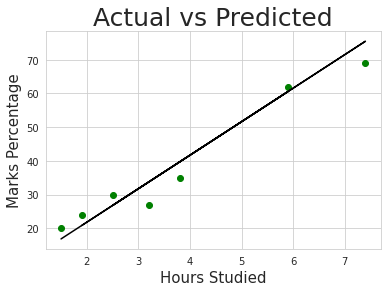

In [ ]:
plt.scatter(x=val_X, y=val_y, color='green')
plt.plot(val_X, pred_y, color='Black')
plt.title('Actual vs Predicted', size=25)
plt.ylabel('Marks Percentage', size=15)
plt.xlabel('Hours Studied', size=15)
plt.show()

#Evaluation of the Model

In [ ]:
#Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502482


*As we can see the value of mean absolute error is small which means that the chances of error are very less*

#Q) What will be predicted score if a student studies for 9.25hrs/day

In [ ]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893


According to the model, the student is likely to score 93.893 marks if he/she studies for 9.25hrs/per